**<center><h1>Advanced Computer Vision for Artificial Intelligence Assignment</h1></center>**
**<center><h2>Part 3 - Object Detection Component (YOLOv8)</h2></center>**
**<center><h3>Matthias Bartolo, Jerome Agius, Isaac Muscat</h3></center>**

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## This Notebook is Structure in the following manner:

- Required libraries
- Downloading the Roboflow datset
- Training the YOLOv8 model
- Testing the YOLOv8 model on the Testing subset
- Testing Results

In [1]:
# !pip install roboflow

In [2]:
# !pip install ultralytics==8.0.20
# !pip install ultralytics -U

**<h3>Required libraries.</h3>**

In [3]:
import torch
import os
import ultralytics
import locale
import glob
import pandas as pd
import matplotlib.pyplot as plt

from IPython import display
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow

%matplotlib inline

**<h3>Using GPU if one is available.</h3>**

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [5]:
# Retrieving the current working directory
HOME = os.getcwd()
print(HOME)

c:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8


**<h3>Downloading the Roboflow dataset.</h3>**

In [6]:
if not os.path.isdir(os.path.join(HOME, 'datasets')):
    os.mkdir(os.path.join(HOME, 'datasets'))
os.chdir(os.path.join(HOME, 'datasets'))

rf = Roboflow(api_key="y2FfMokLpTlGQIlMvhja")
project = rf.workspace("advanced-computer-vision-assignment").project("pizza-object-detector")
dataset = project.version(7).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.226, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Pizza-Object-Detector-7 in yolov8:: 100%|██████████| 6226/6226 [00:04<00:00, 1312.13it/s]


**<h3>Training the YOLOv8 model.</h3>**

In [7]:
# Specifying the paths
model_path = 'yolov8s.pt'
yaml_path = 'C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\data.yaml'

# Creating YOLO object
model = YOLO(model_path)

# Specifying training parameters
num_epochs = 100  # Number of epochs
batch_size = 8  # Adjust based on GPU memory
image_size = 640  # Decrease for faster training

# Training configuration
train_config = {
    'data': yaml_path,
    'imgsz': image_size,
    'batch': batch_size,
    'epochs': num_epochs,
    'device': 0,  # Use GPU 0
    'workers': 1,  # Number of data loading workers
    'optimizer': 'Adam',  # Use Adam optimizer
    'cache': True,  # Cache images for faster training
    'rect': True,  # Use rectangle images
    'patience': 15,  # epochs to wait before decreasing LR
    'weight_decay': 0.0005,  # Weight decay
    'lr0': 0.001,  # Initial learning rate
    'momentum': 0.9,  # Momentum
    'dropout': 0.5,  # Dropout rate
    'val': True,  # Run validation during training
    'plots': True,  # Run plots during training
}

# Train the model
model.train(**train_config)

100%|██████████| 21.5M/21.5M [00:16<00:00, 1.36MB/s]


New https://pypi.org/project/ultralytics/8.0.229 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.226 🚀 Python-3.9.18 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\data.yaml, epochs=100, patience=15, batch=8, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=1, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False

100%|██████████| 6.23M/6.23M [00:06<00:00, 972kB/s] 


AMP: checks passed ✅


train: Scanning C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\train\labels... 2540 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2540/2540 [00:05<00:00, 478.55it/s]


train: New cache created: C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\train\labels.cache


train: Caching images (2.7GB True): 100%|██████████| 2540/2540 [00:05<00:00, 425.00it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Scanning C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\valid\labels... 284 images, 0 backgrounds, 0 corrupt: 100%|██████████| 284/284 [00:00<00:00, 436.84it/s]

val: New cache created: C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\valid\labels.cache



val: Caching images (0.3GB True): 100%|██████████| 284/284 [00:00<00:00, 475.05it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.33G      1.875      2.684       1.72         86        512: 100%|██████████| 318/318 [00:59<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]

                   all        284       7027      0.437       0.21      0.169     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.38G       1.82      2.385      1.695         85        512: 100%|██████████| 318/318 [00:56<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.33it/s]

                   all        284       7027      0.471      0.216      0.202      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.39G      1.799       2.29       1.68         87        512: 100%|██████████| 318/318 [00:56<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.52it/s]

                   all        284       7027      0.491      0.231      0.208      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.37G      1.769      2.198      1.659         87        512: 100%|██████████| 318/318 [00:56<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.25it/s]

                   all        284       7027      0.316      0.237      0.222      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.38G      1.767      2.157      1.655         87        512: 100%|██████████| 318/318 [00:57<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.01it/s]

                   all        284       7027      0.425      0.261      0.225      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.32G      1.743      2.093       1.65         87        512: 100%|██████████| 318/318 [00:56<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.08it/s]

                   all        284       7027      0.376      0.243      0.224       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.39G       1.72      2.009      1.622         87        512: 100%|██████████| 318/318 [00:57<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.94it/s]

                   all        284       7027      0.402      0.273      0.235      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.38G      1.703      1.969      1.608         85        512: 100%|██████████| 318/318 [00:55<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.04it/s]

                   all        284       7027      0.472      0.251      0.244      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.34G      1.696      1.931      1.609         86        512: 100%|██████████| 318/318 [00:56<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.74it/s]

                   all        284       7027      0.389      0.267      0.236      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.33G      1.685      1.899      1.604         87        512: 100%|██████████| 318/318 [00:56<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.03it/s]

                   all        284       7027      0.419      0.261      0.238      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.39G      1.664      1.862      1.591         85        512: 100%|██████████| 318/318 [00:56<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.97it/s]

                   all        284       7027      0.393      0.267       0.25      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.37G      1.654      1.833      1.582         85        512: 100%|██████████| 318/318 [00:55<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.32it/s]

                   all        284       7027      0.391      0.286      0.252      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.38G      1.649      1.803      1.574         84        512: 100%|██████████| 318/318 [00:55<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.31it/s]

                   all        284       7027      0.403      0.286       0.26      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.38G      1.644      1.772      1.572         85        512: 100%|██████████| 318/318 [00:55<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.05it/s]

                   all        284       7027      0.413      0.285      0.261      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.33G      1.636      1.747      1.563         85        512: 100%|██████████| 318/318 [00:55<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.26it/s]

                   all        284       7027      0.411      0.295      0.257      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.37G      1.627      1.719      1.558         84        512: 100%|██████████| 318/318 [00:55<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.29it/s]

                   all        284       7027      0.389      0.297      0.256       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.38G      1.621      1.714       1.55         87        512: 100%|██████████| 318/318 [00:55<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.17it/s]

                   all        284       7027      0.406      0.277      0.252       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.37G      1.617      1.688      1.554         84        512: 100%|██████████| 318/318 [00:55<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.94it/s]

                   all        284       7027      0.344      0.292      0.258      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.32G        1.6      1.653      1.537         86        512: 100%|██████████| 318/318 [00:57<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.28it/s]

                   all        284       7027      0.384      0.301      0.252      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.38G      1.587      1.628      1.531         87        512: 100%|██████████| 318/318 [00:56<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.65it/s]

                   all        284       7027      0.469      0.257      0.248      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.37G      1.591      1.612      1.522         82        512: 100%|██████████| 318/318 [00:56<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.36it/s]

                   all        284       7027      0.418      0.285       0.25      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.39G      1.578      1.593      1.528         86        512: 100%|██████████| 318/318 [00:56<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.36it/s]

                   all        284       7027      0.362      0.294      0.261      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.4G      1.573      1.573      1.518         85        512: 100%|██████████| 318/318 [00:56<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.25it/s]

                   all        284       7027      0.448       0.28      0.258      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.39G      1.569      1.554      1.515         86        512: 100%|██████████| 318/318 [00:56<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        284       7027      0.343      0.303      0.255      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.38G      1.564      1.539      1.504         87        512: 100%|██████████| 318/318 [00:56<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.12it/s]

                   all        284       7027      0.255      0.294      0.247      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.38G      1.558      1.512      1.504         86        512: 100%|██████████| 318/318 [00:56<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.04it/s]

                   all        284       7027      0.286      0.311      0.258      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.38G      1.549        1.5      1.493         87        512: 100%|██████████| 318/318 [00:56<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.82it/s]

                   all        284       7027      0.284      0.312      0.263      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.37G      1.546      1.477      1.498         86        512: 100%|██████████| 318/318 [00:56<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.44it/s]

                   all        284       7027      0.386      0.308      0.269      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.38G      1.532       1.45      1.483         85        512: 100%|██████████| 318/318 [00:56<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.53it/s]

                   all        284       7027      0.284      0.332      0.263      0.149
Stopping training early as no improvement observed in last 15 epochs. Best results observed at epoch 14, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



29 epochs completed in 0.488 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 22.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.0.226 🚀 Python-3.9.18 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.40it/s]


                   all        284       7027      0.414      0.285      0.261      0.153
               Arugula        284        286       0.41     0.0105      0.095     0.0359
                 Bacon        284         56          1          0     0.0562     0.0337
                 Basil        284        730      0.434      0.475      0.453      0.237
              Broccoli        284         33          1          0    0.00944    0.00498
                Cheese        284        355      0.138      0.468      0.205     0.0826
               Chicken        284        378     0.0781      0.037     0.0455      0.021
                  Corn        284        358      0.292      0.235      0.179     0.0727
                   Ham        284        413      0.136     0.0363      0.041     0.0191
              Mushroom        284        763       0.33      0.195      0.182     0.0793
                Olives        284        649      0.609      0.547      0.589      0.311
                 Onio

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000211D4529EE0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.04

**<h3>Validating the YOLOv8 model on the Validation subset.</h3>**

In [8]:
locale.getpreferredencoding = lambda: "UTF-8"
# !pip install aspose-words

In [19]:
model.val() #This will output a train file however it will be on the validation data

**<h3>Validating the YOLOv8 model on the Testing subset.</h3>**

In [11]:
model.val(split='test') #This will output a train file however it will be on the test data

Ultralytics YOLOv8.0.226 🚀 Python-3.9.18 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)


val: Scanning C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\test\labels... 283 images, 0 backgrounds, 0 corrupt: 100%|██████████| 283/283 [00:00<00:00, 483.58it/s]


val: New cache created: C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\test\labels.cache


val: Caching images (0.3GB True): 100%|██████████| 283/283 [00:00<00:00, 479.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  6.61it/s]


                   all        283       5846      0.453        0.3      0.288      0.159
               Arugula        283        209          0          0      0.108     0.0378
                 Bacon        283         49          1          0          0          0
                 Basil        283        492      0.497      0.581      0.515      0.255
              Broccoli        283         31          1          0     0.0262     0.0112
                Cheese        283        620      0.247      0.355      0.197      0.075
               Chicken        283        184     0.0877     0.0543     0.0497     0.0248
                  Corn        283        184      0.175      0.196      0.103     0.0395
                   Ham        283        277       0.14     0.0325     0.0625     0.0277
              Mushroom        283        456      0.335      0.378      0.279      0.129
                Olives        283        580      0.581      0.402      0.476      0.185
                 Onio

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002113B92E6A0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.04

**<h3>Testing the YOLOv8 model on the Testing subset.</h3>**

In [13]:
!yolo task=detect mode=predict model=C:/GitHubRepository/Advanced-Computer-Vision-for-Artificial-Intelligence/Part_3_Object_Detection/YOLOv8/datasets/runs/detect/train/weights/best.pt conf=0.5 source=C:/GitHubRepository/Advanced-Computer-Vision-for-Artificial-Intelligence/Part_3_Object_Detection/YOLOv8/datasets/Pizza-Object-Detector-7/test/images save=True

Ultralytics YOLOv8.0.226 🚀 Python-3.9.18 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)
Model summary (fused): 168 layers, 11131776 parameters, 0 gradients, 28.5 GFLOPs

image 1/283 C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\test\images\000001_jpg.rf.28a0a9ec43243edc5b2179d657363422.jpg: 384x640 1 Pepperoni, 1 Pizza, 90.3ms
image 2/283 C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\test\images\00051_jpg.rf.46ae55e13d218643bc60a0bcd61b9745.jpg: 416x640 2 Cheeses, 1 Pizza, 100.0ms
image 3/283 C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\Pizza-Object-Detector-7\test\images\00052_jpg.rf.d0a75a8c3ec836eb92b6c7ffdc8291c5.jpg: 640x640 3 Basils, 1 Pizza, 9.0ms
image 4/283 C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial

**<h3>Training Results.</h3>**

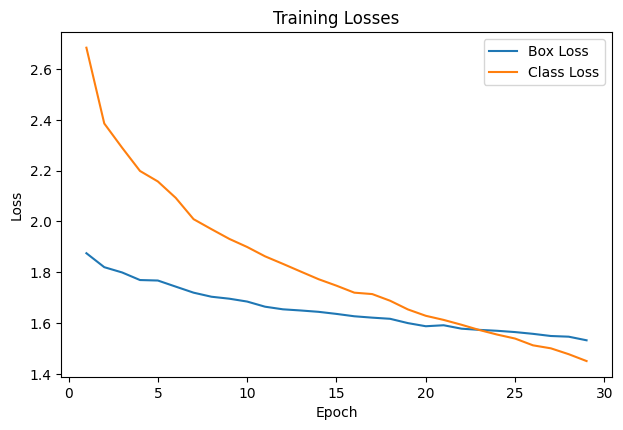

In [15]:
# Replace 'path/to/your/data.csv' with the actual path to your CSV file
file_path = 'C:\GitHubRepository\Advanced-Computer-Vision-for-Artificial-Intelligence\Part_3_Object_Detection\YOLOv8\datasets\\runs\detect\\train\\results.csv'
column_name = 'epoch'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Remove leading spaces from column names
data.columns = data.columns.str.strip()

# Plotting
plt.figure(figsize=(12, 8))

# Plotting the training losses
plt.subplot(2, 2, 1)
plt.plot(data['epoch'], data['train/box_loss'], label='Box Loss')
plt.plot(data['epoch'], data['train/cls_loss'], label='Class Loss')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**<h3>Validation Results.</h3>**

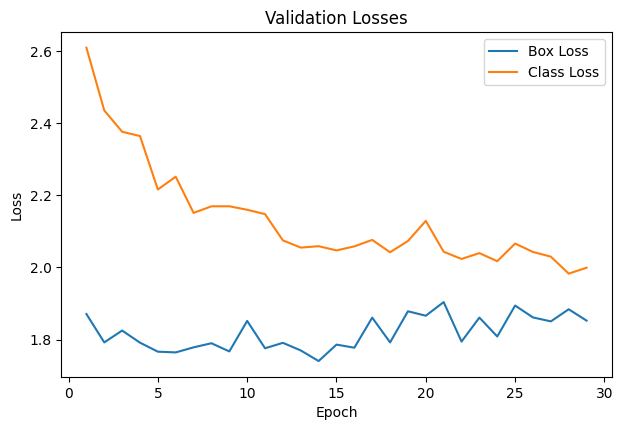

In [16]:
# Plotting
plt.figure(figsize=(12, 8))

# Plotting the training losses
plt.subplot(2, 2, 1)
plt.plot(data['epoch'], data['val/box_loss'], label='Box Loss')
plt.plot(data['epoch'], data['val/cls_loss'], label='Class Loss')
plt.title('Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**<h3>Testing Resultant Images.</h3>**

In [1]:
for image_path in glob.glob(f'{HOME}/datasets/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")